In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [39]:
blog_data = []

with open('./data/raw_post_data.txt', 'rb') as f:
    for raw_line in f:
        line = raw_line.decode("utf-8")
        title = line.split('false')[0]  # do some initial trimming of the row
        data_part = line[line.find('Brad')+4:]  # splitting on the "author" value
        data_list = data_part.split('\t')
        blog_data.append([title.strip(), data_list[1].strip(), data_list[2].strip(), data_list[5].strip()])
    
df_blog_data = pd.DataFrame(blog_data[1:], columns=['title', 'categories', 'tags', 'published'])
df_blog_data = df_blog_data[df_blog_data.title!='All']  # remove the header row from the dataframe

In [55]:
df_blog_data['publish_date'] = df_blog_data.published.apply(lambda p: datetime.strptime(p.split()[1], '%Y/%m/%d'))
df_blog_data['year'] = df_blog_data.publish_date.apply(lambda p: p.year)
df_blog_data['month'] = df_blog_data.publish_date.apply(lambda p: p.month)

In [56]:
df_blog_data

,title,categories,tags,published,publish_date,year,month
0,How are you doing?,genealogy,"miscellany , parenting",Published 2019/11/25,2019-11-25,2019,11
1,Is Third Normal Form obsolete?,technology,"podcasts , tools",Published 2019/11/21,2019-11-21,2019,11
2,Any questions?,general,miscellany,Published 2019/11/01,2019-11-01,2019,11
3,Carrots love tomatoes,general,"miscellany , tools",Published 2019/10/26,2019-10-26,2019,10
4,"divmod, for the win!",technology,"jupyter_notebook , python , tools",Published 2019/10/18,2019-10-18,2019,10
5,Visualizing Six Degrees of Kevin Bacon,technology,"jupyter_notebook , python , tools",Published 2019/09/29,2019-09-29,2019,9
6,Parsing unconventional data files,technology,"jupyter_notebook , linux , python , tools",Published 2019/09/20,2019-09-20,2019,9
7,Filtering on the most recent version of groups...,technology,"jupyter_notebook , python , tools",Published 2019/09/01,2019-09-01,2019,9
8,Teaching the kid to drive,general,parenting,Published 2019/08/17,2019-08-17,2019,8
9,How do you transpose a Question/Answer dataset?,technology,"jupyter_notebook , python , tools",Published 2019/08/12,2019-08-12,2019,8


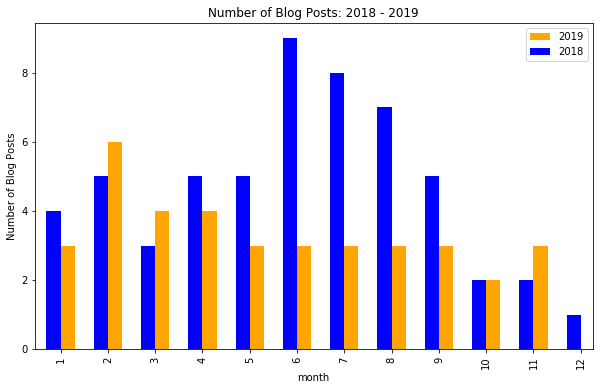

In [81]:
width =0.3
fig, ax = plt.subplots(figsize=(10, 6))

df_blog_data[df_blog_data.year==2019].groupby(['month']).count().iloc[:,[0]].plot(kind='bar', ax=ax, width=width, position=0, color='orange')
df_blog_data[df_blog_data.year==2018].groupby(['month']).count().iloc[:,[0]].plot(kind='bar', ax=ax, width=width, position=1, color='blue')

_ = ax.set_title('Number of Blog Posts: 2018 - 2019')
_ = ax.set_ylabel('Number of Blog Posts')
l = ax.legend()
l.get_texts()[0].set_text('2019')
l.get_texts()[1].set_text('2018')

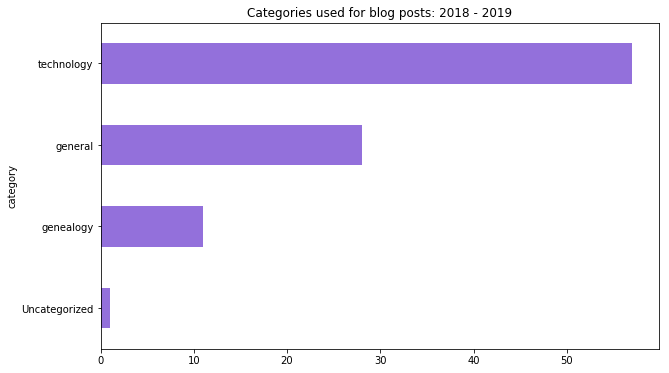

In [102]:
df_cats = pd.DataFrame( ','.join( df_blog_data.categories.tolist()).replace(' ', '').split(','), columns=['category'])
fig, ax = plt.subplots(figsize=(10, 6))

_ = df_cats.groupby('category').size().plot(kind='barh', ax=ax, color='mediumpurple')
_ = ax.set_title('Categories used for blog posts: 2018 - 2019')

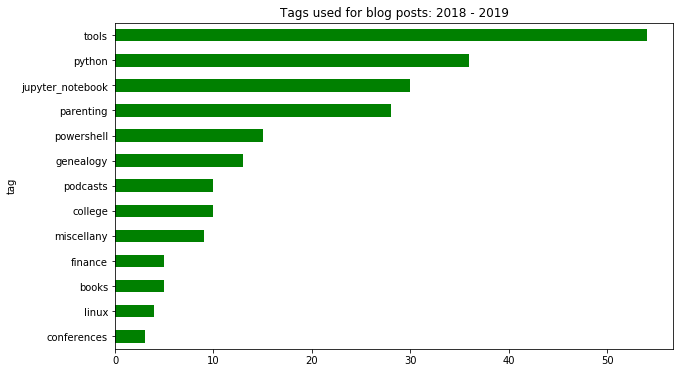

In [99]:
df_tags = pd.DataFrame( ','.join( df_blog_data.tags.tolist()).replace(' ', '').split(','), columns=['tag'])
fig, ax = plt.subplots(figsize=(10, 6))

_ = df_tags.groupby('tag').size().sort_values().plot(kind='barh', ax=ax, color='green')
_ = ax.set_title('Tags used for blog posts: 2018 - 2019')